In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
col_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("Assignment6_DecisionTree/diabetes.csv", header=None, names=col_names)

FileNotFoundError: [Errno 2] No such file or directory: 'Assignment6_DecisionTree/diabetes.csv'

In [ ]:
data.head()

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
data = data[data['pregnancies'] != 'Pregnancies']
for col in col_names:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna()

In [ ]:
feature_cols = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols]
y = data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


In [ ]:
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Precision: 0.6216216216216216
Recall: 0.5411764705882353
F1 Score: 0.5786163522012578


In [ ]:
%pip install graphviz
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install ipywidgets
%pip install six

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"
import pydotplus
from IPython.display import Image
from six import StringIO  # Handles the in-memory text buffer

# Assuming your trained decision tree classifier is named 'clf'
# and your feature names are in 'feature_cols'

dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    feature_names=feature_cols,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Convert to graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display as PNG
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


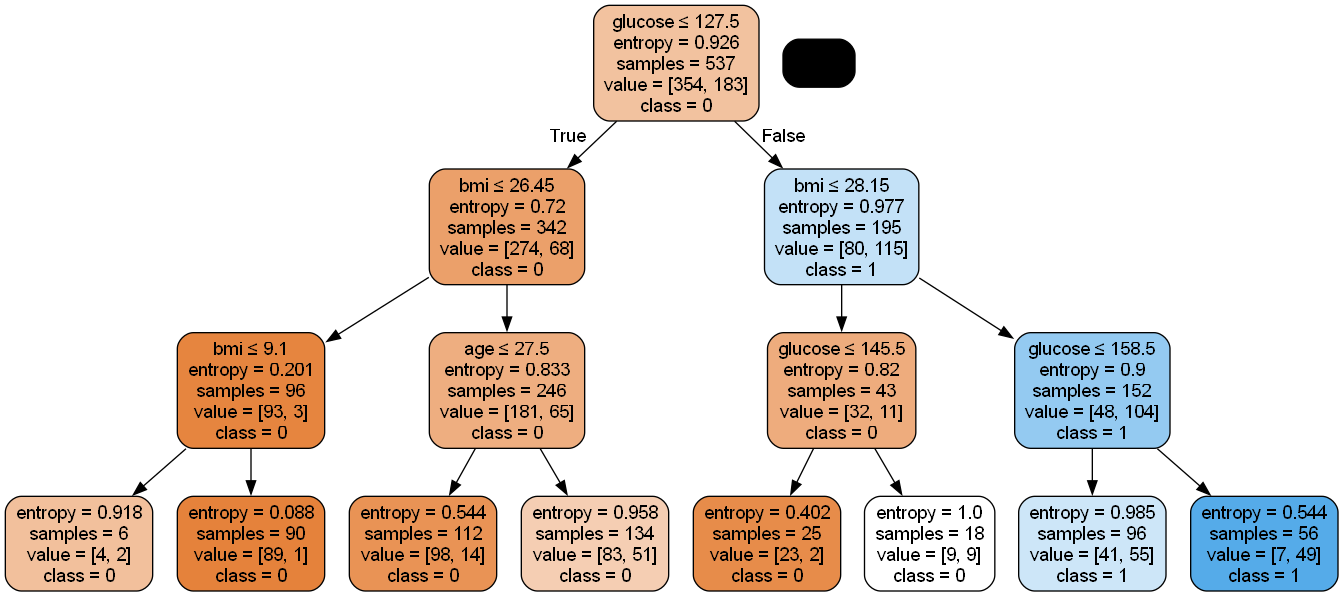

In [ ]:
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

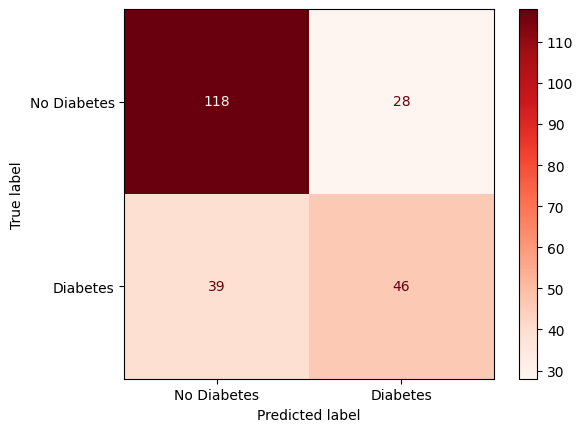

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Reds')